In [1]:
import pandas as pd
import os
import re
import numpy as np

path = "resources/Tablas_elecciones_barrio/"
files = ""
tables = []


In [2]:
tables = []
# Cargar los nombre de todos los archivos almacenados dentro de la carpeta "resources/Tablas_elecciones_barrio/"
for r, d, f in os.walk(path):
    files = f
# lectura y limpieza de las 21 tablas. Resultado: una lista de 21 tablas
contador = 0
for file in files:
    tmp_table = pd.read_excel(path + '{0}'.format(file), 
                              sep=";", encoding="ISO-8859-1")
    tmp_table.columns = [i.strip().replace(' ','_') for i in tmp_table.columns]
    tmp_table['Distrito'] = re.sub(" ", "", re.sub("^[0-9]+(\.)(\s)", "", tmp_table.Barrio[0].upper()))
    tmp_table.drop([0,1], inplace=True)
# #     print(tmp_table.Total_votos_a_candidaturas)
    for i in range(0, len(tmp_table.Barrio)):
        tmp_table.iloc[i,0] = re.sub("[0-9]+(\.)(\s)", "", tmp_table.iloc[i,0].upper())
        tmp_table.iloc[i,0] = re.sub(" ", "", tmp_table.iloc[i,0].upper())
        if 'Á' in tmp_table.iloc[i,0]:
            tmp_table.iloc[i,0] = re.sub("Á", "A", str.strip(tmp_table.iloc[i,0].upper()))
        elif 'É' in tmp_table.iloc[i,0]:
            tmp_table.iloc[i,0] = re.sub("É", "E", str.strip(tmp_table.iloc[i,0].upper()))
        elif 'Í' in tmp_table.iloc[i,0]:    
            tmp_table.iloc[i,0] = re.sub("Í", "I", str.strip(tmp_table.iloc[i,0].upper()))
        elif 'Ó' in tmp_table.iloc[i,0]:    
            tmp_table.iloc[i,0] = re.sub("Ó", "O", str.strip(tmp_table.iloc[i,0].upper()))
        elif 'Ú' in tmp_table.iloc[i,0]:    
            tmp_table.iloc[i,0] = re.sub("Ú", "U", str.strip(tmp_table.iloc[i,0].upper()))
        
#    for j in range(0, len (tmp_table.columns)):
 #       if type(tmp_table.iloc[0,j]) is not str:
  #          tmp_table.iloc[:,j] = tmp_table.iloc[:,j].astype(np.float32)
   #         
    #        for i in range(0, len(tmp_table.iloc[:,j])):
     #           print(tmp_table.iloc[i,j])
      #          num_split = math.modf(tmp_table.iloc[i,j])
       #         num_split = [str(round(num_split[0],3)), str(num_split[1])]
        #        num_split[0] = re.sub("^[0](\.)", "", num_split[0])
         #       if num_split[0] == '0':
          #          num_split[0] = ''
           #     num_split[1] = re.sub("(\.)[0]$", "", num_split[1])
#                tmp_table.iloc[i,j] = int(num_split[1] + num_split[0])
 #               
  #              print(tmp_table.iloc[i,j], '*')
        
    tables.append(tmp_table)


# # Se concatenan las 21 tablas en una sola
main_table_elecciones = pd.concat(tables, sort=True)
# Se unifica el index para toda la tabla
main_table_elecciones.reset_index(drop=True, inplace=True)    
main_table_elecciones


,Abstención,Barrio,CNTG+,Censo_electoral,Cs,Distrito,FE_de_las_JONS,IU-MpM,M.I.,MAS_MADRID,...,PCAS-TC-PPCCAL-PACTO,PCTE,PH,PUM+J,Total_votos_a_candidaturas,ULEG,UPyD,VOX,Votos_blancos,Votos_nulos
0,5.379,PALACIO,7.0,17.845,1.622,CENTRO,5.0,454.000,5.0,5.998,...,3.0,1.0,0.0,7.0,12.369,1.0,8.0,724.0,50.0,47.0
1,10.829,EMBAJADORES,28.0,31.496,2.120,CENTRO,7.0,1.443,12.0,11.166,...,14.0,6.0,6.0,7.0,20.517,0.0,11.0,949.0,94.0,56.0
2,2.466,CORTES,6.0,7.755,779.000,CENTRO,2.0,188.000,1.0,2.410,...,1.0,3.0,2.0,2.0,5.246,0.0,3.0,300.0,27.0,16.0
3,4.225,JUSTICIA,9.0,12.838,1.518,CENTRO,6.0,183.000,4.0,3.502,...,0.0,0.0,1.0,6.0,8.554,0.0,13.0,594.0,37.0,22.0
4,7.683,UNIVERSIDAD,19.0,23.738,2.296,CENTRO,13.0,527.000,4.0,7.932,...,6.0,5.0,3.0,6.0,15.951,2.0,11.0,822.0,56.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,3.309,ALAMEDADEOSUNA,9.0,15.162,2.871,BARAJAS,6.0,174.000,2.0,3.447,...,2.0,0.0,9.0,10.0,11.780,1.0,14.0,945.0,36.0,37.0
127,583.000,AEROPUERTO,0.0,1.244,122.000,BARAJAS,1.0,12.000,0.0,249.000,...,0.0,2.0,0.0,0.0,658.000,0.0,0.0,70.0,0.0,3.0
128,2.049,CASCOHISTORICODEBARAJAS,4.0,5.505,661.000,BARAJAS,3.0,61.000,1.0,955.000,...,3.0,3.0,3.0,0.0,3.434,1.0,0.0,343.0,11.0,11.0
129,2.516,TIMON,3.0,8.761,1.636,BARAJAS,1.0,103.000,3.0,1.926,...,4.0,1.0,3.0,5.0,6.194,1.0,11.0,511.0,29.0,22.0


In [3]:
import pandas as pd


# Cargar la tabla del Padron por barrios
padron = pd.read_excel("resources/padron_barrios.xls")


In [4]:
# Limpieza y organización de la tabla
tmp = []
separador_tabla = 0
for i in range(0, len(padron.Españoles_Hombres)):
    if pd.isna(padron.Españoles_Hombres[i]):
        dis_bar = padron.Edad[i].replace(" ", "").split("/")
        for j in  range(i+1, len(padron.Españoles_Hombres)):
            if pd.isna(padron.Españoles_Hombres[j]):
                tmp.append(padron.iloc[i:j,].copy(deep=True))
                tmp[separador_tabla].drop([i,i+1], inplace=True) 
                tmp[separador_tabla]['Distrito'] = dis_bar[0]
                tmp[separador_tabla]['Barrio'] = dis_bar[1].strip()
                break
        separador_tabla += 1

main_table_padron = pd.concat(tmp)
main_table_padron.Barrio = [str.strip(i) for i in main_table_padron.Barrio]
main_table_padron.reset_index(drop=True, inplace=True)
main_table_padron.iloc[:,1:10] = main_table_padron.iloc[:,1:10].astype(int)
main_table_padron

,Edad,Españoles_Hombres,Españoles_Mujeres,Españoles_Total,Extranjeros_Hombres,Extranjeros_Mujeres,Extranjeros_Total,Total_Hombres,Total_Mujeres,Total,Distrito,Barrio
0,0 - 4,263,238,501,56,50,106,319,288,607,CENTRO,PALACIO
1,5 - 9,235,265,500,43,38,81,278,303,581,CENTRO,PALACIO
2,10 - 14,227,238,465,30,38,68,257,276,533,CENTRO,PALACIO
3,15 - 19,234,282,516,44,55,99,278,337,615,CENTRO,PALACIO
4,20 - 24,323,346,669,161,212,373,484,558,1042,CENTRO,PALACIO
...,...,...,...,...,...,...,...,...,...,...,...,...
2719,80 - 84,72,96,168,2,4,6,74,100,174,BARAJAS,TIMON
2720,85 - 89,47,91,138,1,3,4,48,94,142,BARAJAS,TIMON
2721,90 - 94,22,44,66,0,2,2,22,46,68,BARAJAS,TIMON
2722,95 - 99,7,9,16,0,1,1,7,10,17,BARAJAS,TIMON


In [5]:

import seaborn as sns
import matplotlib.pyplot as plt

# intersección de tablas por la columna Distrito y Barrio
work_table = main_table_elecciones.merge(main_table_padron, on=["Distrito", "Barrio"])
# work_table.head()
#work_table.iloc[:,2:26] = work_table.iloc[:,2:26].astype(int)
#work_table.iloc[:,0:26] = work_table.iloc[:,0:26].replace(".","")
work_table

,Abstención,Barrio,CNTG+,Censo_electoral,Cs,Distrito,FE_de_las_JONS,IU-MpM,M.I.,MAS_MADRID,...,Edad,Españoles_Hombres,Españoles_Mujeres,Españoles_Total,Extranjeros_Hombres,Extranjeros_Mujeres,Extranjeros_Total,Total_Hombres,Total_Mujeres,Total
0,5.379,PALACIO,7.0,17.845,1.622,CENTRO,5.0,454.0,5.0,5.998,...,0 - 4,263,238,501,56,50,106,319,288,607
1,5.379,PALACIO,7.0,17.845,1.622,CENTRO,5.0,454.0,5.0,5.998,...,5 - 9,235,265,500,43,38,81,278,303,581
2,5.379,PALACIO,7.0,17.845,1.622,CENTRO,5.0,454.0,5.0,5.998,...,10 - 14,227,238,465,30,38,68,257,276,533
3,5.379,PALACIO,7.0,17.845,1.622,CENTRO,5.0,454.0,5.0,5.998,...,15 - 19,234,282,516,44,55,99,278,337,615
4,5.379,PALACIO,7.0,17.845,1.622,CENTRO,5.0,454.0,5.0,5.998,...,20 - 24,323,346,669,161,212,373,484,558,1042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2678,2.516,TIMON,3.0,8.761,1.636,BARAJAS,1.0,103.0,3.0,1.926,...,80 - 84,72,96,168,2,4,6,74,100,174
2679,2.516,TIMON,3.0,8.761,1.636,BARAJAS,1.0,103.0,3.0,1.926,...,85 - 89,47,91,138,1,3,4,48,94,142
2680,2.516,TIMON,3.0,8.761,1.636,BARAJAS,1.0,103.0,3.0,1.926,...,90 - 94,22,44,66,0,2,2,22,46,68
2681,2.516,TIMON,3.0,8.761,1.636,BARAJAS,1.0,103.0,3.0,1.926,...,95 - 99,7,9,16,0,1,1,7,10,17


In [6]:
# Selección de las personas de 20 a 34 años
rangos_edades = pd.unique(work_table.Edad)
rango_edades = np.delete(rangos_edades, [0,1,2,3])
rango_infantes =np.delete(rangos_edades, [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
Adultos = np.delete(rangos_edades, [6,7,8,9,10,11,12,13,14,15,16])

# Fuciones para consultar la tabla general y obtener información 
def seleccionar_data_por_edad(edades, col_padron, func):
    temp_one = work_table[work_table['Edad'].isin(edades)].copy(deep=True)
    temp = temp_one.groupby(['Distrito']).agg({col_padron: func}).reset_index()
    return temp

# Numero de personas por distrito entre los 20 y 34 años
numero_jovenes_distrito = seleccionar_data_por_edad(rango_edades, 'Total', 'sum')
numero_infantes = seleccionar_data_por_edad(rango_infantes, 'Total','sum')
numero_adultos = seleccionar_data_por_edad(Adultos, 'Total','sum')
# Numero de infantes:


# Organizar los datos para graficar.
numero_jovenes_distrito['Infantes'] = numero_infantes.Total
numero_jovenes_distrito = numero_jovenes_distrito.sort_values('Total', ascending=False)
numero_jovenes_distrito

,Distrito,Total,Infantes
2,CARABANCHEL,212413,47128
9,LATINA,204100,37724
12,PUENTEDEVALLECAS,198148,42373
6,CIUDADLINEAL,184387,35371
7,FUENCARRAL-ELPARDO,156215,46949
8,HORTALEZA,151749,41626
16,TETUAN,137961,23576
0,ARGANZUELA,131888,23958
15,SANBLAS-CANILLEJAS,129674,31627
14,SALAMANCA,127139,20938


In [7]:
import folium
from folium.plugins import HeatMap
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = 14, 10
sns.set_context('talk')

madrid = folium.Map(location=[40.42, -3.7], zoom_start=12, tiles='cartodbpositron')

madrid

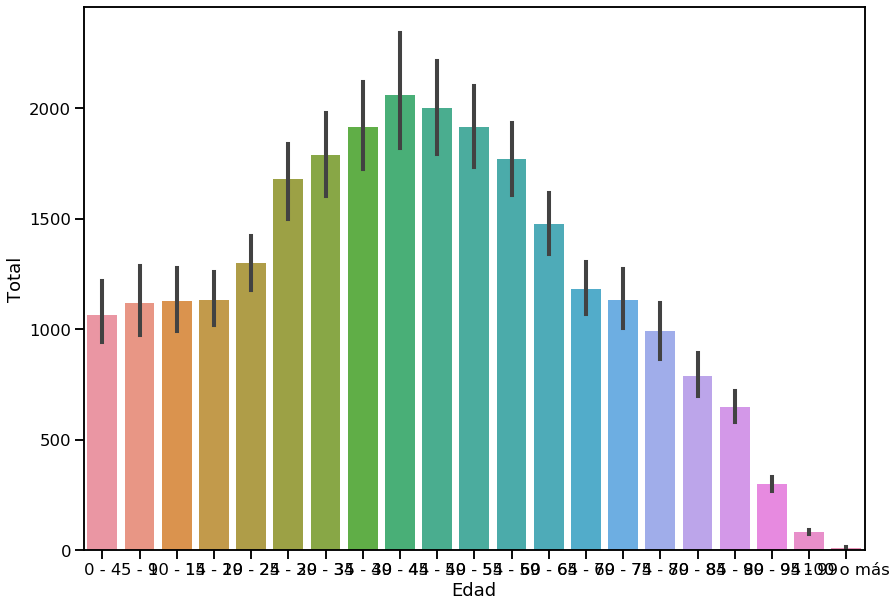

In [8]:
out = sns.barplot(x='Edad', y='Total', data=work_table)

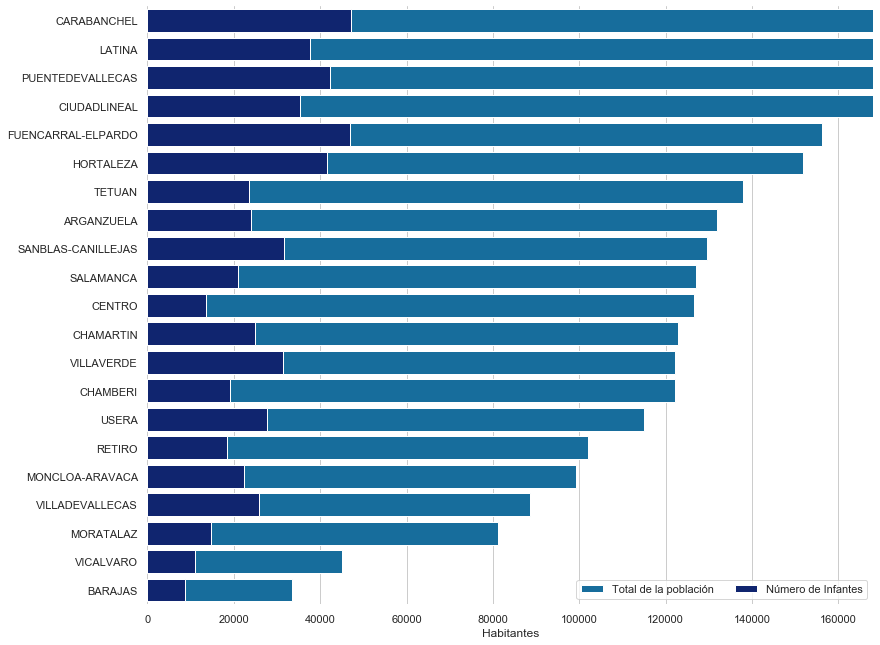

In [14]:
# Se plotea la gráfica para ver el barrio

sns.set(style="whitegrid")
sns.set_color_codes("colorblind")
f, ax = plt.subplots(figsize=(13, 11))
q = sns.barplot(y="Distrito" , x="Total", data=numero_jovenes_distrito,
            label="Total de la población", color="b")

sns.set_color_codes("dark")
q = sns.barplot(y="Distrito" , x='Infantes', data=numero_jovenes_distrito,
            label="Número de Infantes",  color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 168000), ylabel="",
       xlabel="Habitantes")
sns.despine(left=True, bottom=True)